In [8]:
import numpy as np
import pandas as pd

def compute_class_centroid(data, label_column, class_label):
    """Computes the centroid (mean vector) of a given class."""
    class_data = data[data[label_column] == class_label].drop(columns=[label_column])
    return np.mean(class_data, axis=0)

def compute_class_spread(data, label_column, class_label):
    """Computes the spread (standard deviation) of a given class."""
    class_data = data[data[label_column] == class_label].drop(columns=[label_column])
    return np.std(class_data, axis=0)

def compute_centroid_distance(centroid1, centroid2):
    """Computes Euclidean distance between two class centroids."""
    return np.linalg.norm(centroid1 - centroid2)

def compute_intraclass_distance(data, label_column, class_label, centroid):
    """Computes the average Euclidean distance of all points in a class from their centroid."""
    class_data = data[data[label_column] == class_label].drop(columns=[label_column])
    distances = np.linalg.norm(class_data - centroid, axis=1)
    return np.mean(distances)

# Load dataset
file_path = "C:\\Users\\yasaswini ginjupalli\\Downloads\\DiabetesPrediction\\assets\\data_asset\\diabetes.csv"
df = pd.read_csv(file_path)
    
# Define class labels
class_0 = 0  # Non-diabetic
class_1 = 1  # Diabetic
label_column = "Outcome"
    
# Compute centroids
centroid_0 = compute_class_centroid(df, label_column, class_0)
centroid_1 = compute_class_centroid(df, label_column, class_1)
    
# Compute spreads
spread_0 = compute_class_spread(df, label_column, class_0)
spread_1 = compute_class_spread(df, label_column, class_1)
    
# Compute interclass distance
centroid_distance = compute_centroid_distance(centroid_0, centroid_1)
    
# Compute intraclass distances
intraclass_distance_0 = compute_intraclass_distance(df, label_column, class_0, centroid_0)
intraclass_distance_1 = compute_intraclass_distance(df, label_column, class_1, centroid_1)

# Display results
print("Class 0 Centroid (Non-Diabetic):", centroid_0)
print("Class 1 Centroid (Diabetic):", centroid_1)
print("Class 0 Spread (Non-Diabetic):", spread_0)
print("Class 1 Spread (Diabetic):", spread_1)
print("Interclass Distance between Centroids:", centroid_distance)
print("Intraclass Distance for Class 0 (Non-Diabetic):", intraclass_distance_0)
print("Intraclass Distance for Class 1 (Diabetic):", intraclass_distance_1)

Class 0 Centroid (Non-Diabetic): Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
dtype: float64
Class 1 Centroid (Diabetic): Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
dtype: float64
Class 0 Spread (Non-Diabetic): Pregnancies                  3.014166
Glucose                     26.115045
BloodPressure               18.045003
SkinThickness               14.875050
Insulin                     98.766375
BMI                          7.682161
DiabetesPedigreeFunction 

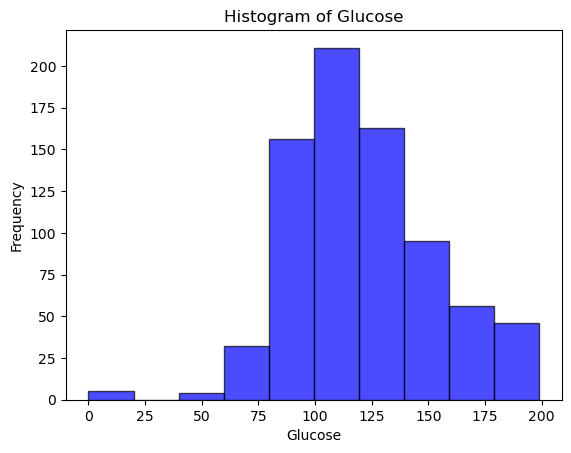

Mean of Glucose: 120.89453125
Variance of Glucose: 1020.9172617594401


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_histogram(data, feature_column, bins=10):
    """Plots the histogram for a given feature and computes mean and variance."""
    feature_data = data[feature_column]
    plt.hist(feature_data, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel(feature_column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature_column}")
    plt.show()
    return np.mean(feature_data), np.var(feature_data)

feature_column = "Glucose"
mean_value, variance_value = plot_feature_histogram(df, feature_column)
print(f"Mean of {feature_column}:", mean_value)
print(f"Variance of {feature_column}:", variance_value)


C:\Users\yasaswini ginjupalli\AppData\Local\Temp\ipykernel_12824\461488631.py:7: RuntimeWarning: invalid value encountered in scalar power
  return np.sum(np.abs(vec1 - vec2) ** r) ** (1 / r)


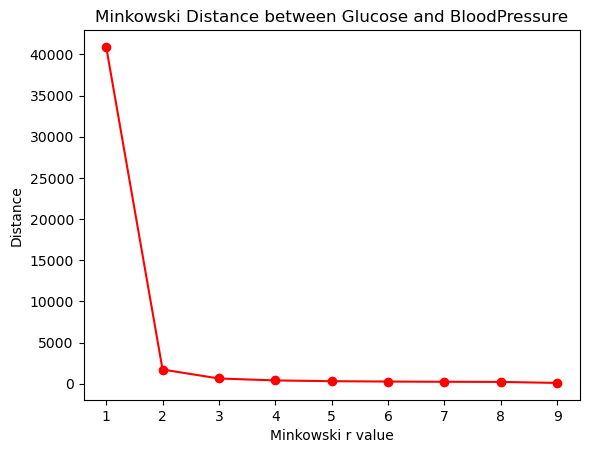

Minowski distances for r value range:  [40906.0, 1728.1261528025088, 643.2031797219933, 406.38051037589815, 314.9867624761186, 269.41798687993065, 243.29078013322422, 226.9930621736581, 104.2403569943418, nan]


In [25]:
import numpy as np
def compute_minkowski_distance(vec1, vec2, r):
    """Computes the Minkowski distance between two vectors for a given r."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    if r <= 0:
        raise ValueError("r must be greater than 0")
    return np.sum(np.abs(vec1 - vec2) ** r) ** (1 / r)

def plot_minkowski_distance(data, feature1, feature2):
    """Plots the Minkowski distance for r values from 1 to 10 between two features."""
    vec1 = data[feature1].values
    vec2 = data[feature2].values
    r_values = np.arange(1, 11)
    distances = [compute_minkowski_distance(vec1, vec2, r) for r in r_values]
    
    plt.plot(r_values, distances, marker='o', linestyle='-', color='red')
    plt.xlabel("Minkowski r value")
    plt.ylabel("Distance")
    plt.title(f"Minkowski Distance between {feature1} and {feature2}")
    plt.show()
    return distances
feature1 = "Glucose"
feature2 = "BloodPressure"
print("Minowski distances for r value range: ",plot_minkowski_distance(df, feature1, feature2))

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_and_preprocess_data(file_path):
    """Load dataset and preprocess by scaling features."""
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Outcome'])  # Feature set
    y = df['Outcome']  # Target variable
    
    # Standardizing the feature set for better k-NN performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split dataset into training and testing sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)



In [19]:
def train_knn(X_train, y_train, k=3):
    """Train k-NN classifier with k=3."""
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

In [20]:
def evaluate_model(knn, X_test, y_test):
    """Evaluate the trained k-NN model and return accuracy score."""
    return knn.score(X_test, y_test)


file_path = "C:\\Users\\yasaswini ginjupalli\\Downloads\\DiabetesPrediction\\assets\\data_asset\\diabetes.csv"
X, y = load_and_preprocess_data(file_path)
X_train, X_test, y_train, y_test = split_data(X, y)
knn_model = train_knn(X_train, y_train, k=3)
accuracy = evaluate_model(knn_model, X_test, y_test)
    
print(f"k-NN Model Accuracy (k=3): {accuracy:.2f}")

k-NN Model Accuracy (k=3): 0.71


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def predict_vector(knn, test_vect):
    """Predict class for a given test vector."""
    return knn.predict([test_vect])

test_vect = X_test[0]
prediction = predict_vector(knn_model, test_vect)
print(f"Predicted class for test vector: {prediction[0]}")

Predicted class for test vector: 0


In [22]:
knn_model = train_knn(X_train, y_train, k=3)
accuracy = evaluate_model(knn_model, X_test, y_test)
print(f"k-NN Model Accuracy (k=3): {accuracy:.2f}")
knn_model1 = train_knn(X_train, y_train, k=1)
accuracy1 = evaluate_model(knn_model1, X_test, y_test)
print(f"k-NN Model Accuracy (k=1): {accuracy1:.2f}")

k-NN Model Accuracy (k=3): 0.71
k-NN Model Accuracy (k=1): 0.62


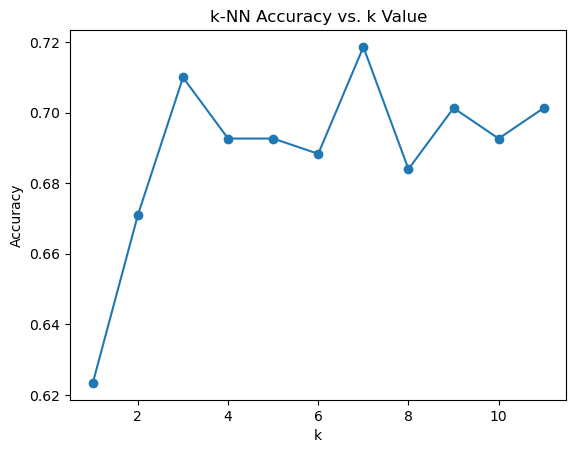

In [23]:
def plot_accuracy(X_train, X_test, y_train, y_test):
    """Vary k from 1 to 11 and plot accuracy."""
    k_values = range(1, 12)
    accuracies = []
    
    for k in k_values:
        knn = train_knn(X_train, y_train, k)
        accuracies.append(evaluate_model(knn, X_test, y_test))
    
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('k-NN Accuracy vs. k Value')
    plt.show()

plot_accuracy(X_train, X_test, y_train, y_test)

In [24]:
def evaluate_confusion_matrix(knn, X_test, y_test):
    """Compute confusion matrix and other performance metrics."""
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return cm, report

cm, report = evaluate_confusion_matrix(knn_model, X_test, y_test)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

Confusion Matrix:
[[123  28]
 [ 39  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       151
           1       0.59      0.51      0.55        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231

